## install & load packages

In [1]:
!pip -q install git+https://github.com/mwshinn/PyDDM
import pyddm
import pyddm.plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyddm import Sample

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## prep data

In [2]:
# Load data - need to manually upload inference_tidy.csv into the files tab on each new runtime
df = pd.read_csv('inference_tidy.csv')
df = df.dropna(subset=['RT'])

# 12/weighted drifts with "thinning" / memory sampling rate adjustment; same drift for congruent & incongruent

In [3]:
def drift_weights(t, trueCue, coherence, memSampleRate, signal1_onset, noise2_onset, signal2_onset,
                      mw80_noise1, mw50_noise1, mw80_signal1, mw50_signal1, mw80_noise2, mw50_noise2, mw80_signal2, mw50_signal2,
                      vw80_signal1, vw50_signal1, vw80_signal2, vw50_signal2):
    if t < signal1_onset:
        return trueCue/memSampleRate * (mw80_noise1 if abs(trueCue) == 0.8 else mw50_noise1)
    elif t < noise2_onset:
        return trueCue/memSampleRate * (mw80_signal1 if abs(trueCue) == 0.8 else mw50_signal1) + coherence * (vw80_signal1 if abs(trueCue) == 0.8 else vw50_signal1)
    elif t < signal2_onset:
        return trueCue/memSampleRate * (mw80_noise2 if abs(trueCue) == 0.8 else mw50_noise2)
    else:
        return trueCue/memSampleRate * (mw80_signal2 if abs(trueCue) == 0.8 else mw50_signal2) + coherence * (vw80_signal2 if abs(trueCue) == 0.8 else vw50_signal2)


# specify model
model = pyddm.gddm(
    drift = drift_weights,
    starting_position = 0,
    bound="B",
    T_dur = 4.1,
    nondecision='ndt',
    parameters={'B': (0.01, 4), 'ndt': (0.1,0.5), 'memSampleRate': (1,150),
                'mw80_noise1': (-2, 2), 'mw50_noise1': (-2,2),
                'mw80_signal1': (-2, 2), 'mw50_signal1': (-2, 2),
                'mw80_noise2': (-2, 2), 'mw50_noise2': (-2,2),
                'mw80_signal2': (-2, 2), 'mw50_signal2': (-2, 2),
                 'vw80_signal1': (-2, 2), 'vw50_signal1': (-2, 2),
                'vw80_signal2': (-2, 2), 'vw50_signal2': (-2, 2)},
    conditions = ['trueCue', 'coherence', 'signal1_onset', 'noise2_onset', 'signal2_onset']
)


pyddm.plot.model_gui_jupyter(model, conditions={'trueCue': [-0.8, 0.5, 0.8],
                                                'coherence': [0.7],
                                                'trueCongruence': ['congruent', 'incongruent', 'neutral'],
                                                'signal1_onset': [0.8],
                                                'noise2_onset': [1.2],
                                                'signal2_onset': [2.2]})

Output()

## subject 38

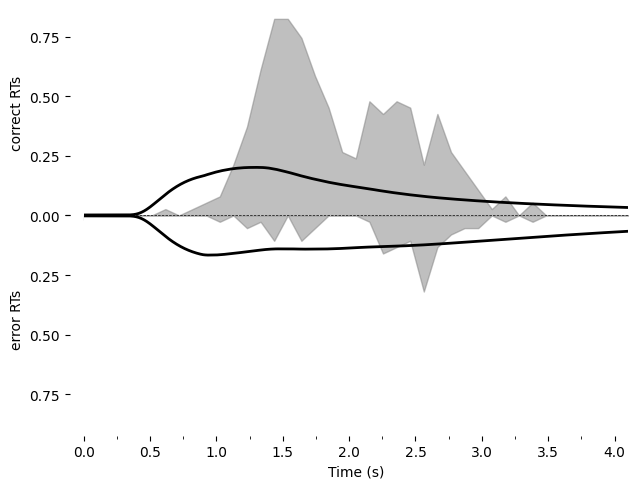

In [ ]:
sample_38 = pyddm.Sample.from_pandas_dataframe(df[df['subID']==38], rt_column_name="RT", choice_column_name="accuracy")

# fitted bound for 12drifts = 1.61; fitted ndt for 12drifts = 0.237
# fitted bound for 8drifts = 1.58
pyddm.plot.model_gui_jupyter(model, sample_38, data_dt=0.1)

## with different drift rates for congruent and incongruent

In [ ]:
def drift_weights2(t, trueCue, coherence, memSampleRate, signal1_onset, noise2_onset, signal2_onset,
                  congDrift_noise1, incongDrift_noise1, neutDrift_noise1,
                  congDrift_signal1, incongDrift_signal1, neutDrift_signal1, vwCongruent_signal1, vwIncongruent_signal1, vwNeutral_signal1,
                  congDrift_noise2, incongDrift_noise2, neutDrift_noise2,
                  congDrift_signal2, incongDrift_signal2, neutDrift_signal2, vwCongruent_signal2, vwIncongruent_signal2, vwNeutral_signal2):
    if t < signal1_onset:
      if trueCue > 0.5:
        return trueCue/memSampleRate * congDrift_noise1
      elif  trueCue < 0:
        return trueCue/memSampleRate * incongDrift_noise1
      else:
        return trueCue/memSampleRate * neutDrift_noise1
    elif t > signal1_onset & t < noise2_onset:
      if trueCue > 0.5:
        return trueCue/memSampleRate * congDrift_signal1 + coherence * vwCongruent_signal1
      elif  trueCue < 0:
        return trueCue/memSampleRate * incongDrift_signal1 + coherence * vwIncongruent_signal1
      else :
        return trueCue/memSampleRate * neutDrift_signal1 + coherence * vwNeutral_signal1
    elif t > noise2_onset & t < signal2_onset:
      if trueCue > 0.5:
        return trueCue/memSampleRate * congDrift_noise2
      elif  trueCue < 0:
        return trueCue/memSampleRate * incongDrift_noise2
      else:
        return trueCue/memSampleRate * neutDrift_noise2
    else:
      if trueCue > 0.5:
        return trueCue/memSampleRate * congDrift_signal2 + coherence * vwCongruent_signal2
      elif  trueCue < 0:
        return trueCue/memSampleRate * incongDrift_signal2 + coherence * vwIncongruent_signal2
      else:
        return trueCue/memSampleRate * neutDrift_signal2 + coherence * vwNeutral_signal2

# specify model
model2 = pyddm.gddm(
    drift = drift_weights2,
    starting_position = 0,
    bound="B",
    T_dur = 4.1,
    nondecision='ndt',
    parameters={'B': (0.01, 4), 'ndt': (0.1,0.5), 'memSampleRate': (1,150),
                'mw80_noise1': (-1, 1), 'mw50_noise1': (-1,1),
                'mw80_signal1': (-1, 1), 'mw50_signal1': (-1, 1),
                'mw80_noise2': (-1, 1), 'mw50_noise2': (-1,1),
                'mw80_signal2': (-1, 1), 'mw50_signal2': (-1, 1),
                 'vw80_signal1': (-1, 1), 'vw50_signal1': (-1, 1),
                'vw80_signal2': (-1, 1), 'vw50_signal2': (-1, 1)},
    conditions = ['trueCue', 'coherence', 'signal1_onset', 'noise2_onset', 'signal2_onset']
)